In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib.cm as cm
import math

def truncate(number, digits):
    stepper = pow(10.0, digits)
    return math.trunc(stepper * number) / stepper

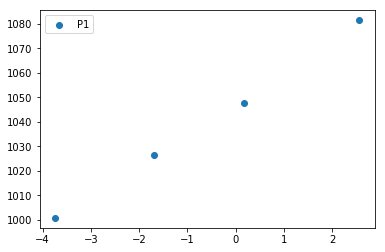

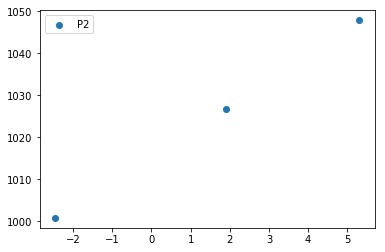

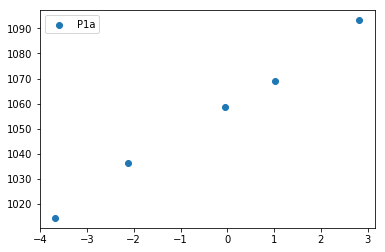

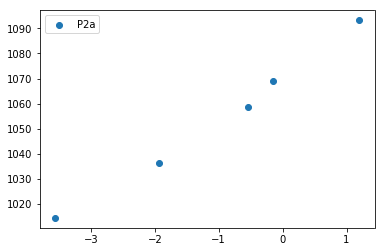

In [2]:
tcond1 = sorted(glob.glob('testcond1/*'))
tcond2 = sorted(glob.glob('testcond2/*'))
tcond3 = sorted(glob.glob('testcond3/*'))
tcond4 = sorted(glob.glob('testcond4/*'))
testcond1 = np.empty(len(tcond1))
testcond2 = np.empty(len(tcond2))
testcond3 = np.empty(len(tcond3))
testcond4 = np.empty(len(tcond4))

for i in range(len(tcond1)):
    testdat1 = np.loadtxt(tcond1[i], skiprows = 1)
    p1con = testdat1[:,2]
    avcond1 = np.mean(p1con)
    testcond1[i] = avcond1

for i in range(len(tcond2)):
    testdat2 = np.loadtxt(tcond2[i], skiprows = 1)
    p2cond = testdat2[:,3]
    avcond2 = np.mean(p2cond)
    testcond2[i] = avcond2

for i in range(len(tcond3)):
    testdat3 = np.loadtxt(tcond3[i], skiprows = 1)
    p3cond = testdat3[:,2]
    avcond3 = np.mean(p3cond)
    testcond3[i] = avcond3
    
for i in range(len(tcond4)):
    testdat4 = np.loadtxt(tcond4[i], skiprows =1)
    p2acond = testdat4[:,3]
    avcond2a = np.mean(p2acond)
    testcond4[i] = avcond2a
    
xt1 = np.array([1.0007947, 1.026676, 1.047863, 1.081488]) * 1000
xt2 = np.array([1.0007947, 1.026676, 1.047863]) * 1000
xt4 = np.array([1.01443, 1.036289, 1.058674, 1.068957, 1.093224]) * 1000
plt.figure(1)
plt.scatter(testcond1[1:], xt1, label = 'P1')
plt.legend(loc = 0)

p2cond = testcond2[:-1]
plt.figure(2)
plt.scatter(p2cond[1:], xt2, label = 'P2')
plt.legend(loc = 0)

plt.figure(3)
plt.scatter(testcond3, xt4, label = 'P1a')
plt.legend(loc = 0)

plt.figure(4)
plt.scatter(testcond4, xt4, label = 'P2a')
plt.legend(loc = 0)
plt.show()

bfit1 = np.polyfit(testcond1[1:], xt1, deg = 1)
bfit2 = np.polyfit(p2cond[1:], xt2, deg = 1)
bfit3 = np.polyfit(testcond3, xt4, deg = 1)
bfit4 = np.polyfit(testcond4, xt4, deg = 1)


In [3]:
### fit between 30 - 90% of probe travel
### take mean dp/dz
fnames = sorted(glob.glob('pdat/*'))
dpdz = np.zeros(len(fnames))
denintercept = np.zeros(len(fnames))
for q in range(len(fnames)):
    data = np.loadtxt(fnames[q], skiprows = 1)
    time = data[:,0]
    ph = data[:,1]
    cond = data[:,2]
    places = np.where(np.roll(ph,1) > ph)[0]
    pr = np.empty((len(places),2))
    for i in range(len(places)):
        if i>=1:
            probeind = (places[i-1],places[i])
            pr[i,0] = probeind[0]
            pr[i,1] = probeind[1] 
    dupes = np.where(pr[:,1] - pr[:,0] == 1 )[0]
    pr = np.delete(pr, dupes, axis = 0)
    if len(pr) > 50:
        pr = pr[-12:]
    pr = pr[2:]
  
    den1 = np.empty(len(pr))
    denint = np.empty(len(pr))
    for b in range(len(pr)):
        xax = int(pr[b,0]) 
        yax = int(pr[b,1]) 
        tx = time[xax:yax:1]
        cplot = (cond[xax:yax:1])
        cplot = cplot[1:]
        rhoplot = bfit1[0]*cplot + bfit1[1]
        if q == 16:
            rhoplot = bfit3[0]*cplot + bfit3[1]
            
        pplot = (ph[xax:yax:1])
        pplot = pplot[1:]
        tlen = len(tx)
        t90 = int(tlen * 0.90)
        t30 = int(tlen * 0.3)
        pbound = (pplot[t30:t90:1])/1000.0
        pbound = pbound[1:]
        rhobound = rhoplot[t30:t90:1]
        rhobound = rhobound[1:]
        fitden = np.polyfit(pbound, rhobound, deg = 1)
        dengrad = fitden[0]
        denint0 = fitden[1]
        den1[b] = dengrad
        denint[b] = denint0
    deng = np.mean(den1)
    denintercept[q] = np.mean(denint)
    dpdz[q] = -deng
#print(dpdz)


inputdata = np.loadtxt('2019-04-11p1.txt', skiprows = 1)
density = inputdata[:,0]
depth = inputdata[:,1] * -1 / 1000.0
gradient = np.polyfit(depth, density, deg = 1)
densgrad = gradient[0]
deninter = gradient[1]
lingrad = np.loadtxt('lingrad.txt', skiprows = 1)
ncol = len(lingrad[0,:])

linstrat = np.empty(ncol-1)
denint2 = np.empty(ncol-1)
w = 1
for i in range(ncol-1):
    z = lingrad[:,0]
    dens = lingrad[:,w]
    bfitden = np.polyfit(z, dens, deg = 1)
    linstrat[i] = bfitden[0] * -1000
    denint2[i] = bfitden[1]
    w+=1
    
arr1 = np.append(dpdz, densgrad)
drhodz = -np.append(arr1, linstrat)
arr2 = np.append(denintercept, deninter)
interceptdensity = np.append(arr2, denint2)
print(drhodz)
print(interceptdensity)
print(len(drhodz))

[ 71.46788888  42.46800173  59.22901245  72.90336553  84.20401098
  55.65907096  60.55694147  88.57493095  57.6342968   39.79005623
  43.93815141  77.02822927  67.95281146  97.98645832  61.68472615
  58.69039917  66.75128716  40.88696772  50.30970226  99.02853597
  84.29415191  70.02596156]
[  992.35961011  1000.55570503  1010.06393127  1014.200367     993.23165962
  1012.11915034  1015.16416663  1013.62239186  1026.09169642  1026.24753173
  1028.42125593   995.3725249   1009.67936305   998.93053909  1017.72357202
  1027.63172134  1032.14038772  1036.74998514  1037.09676145  1008.38043477
  1027.03871712  1041.40947832]
22


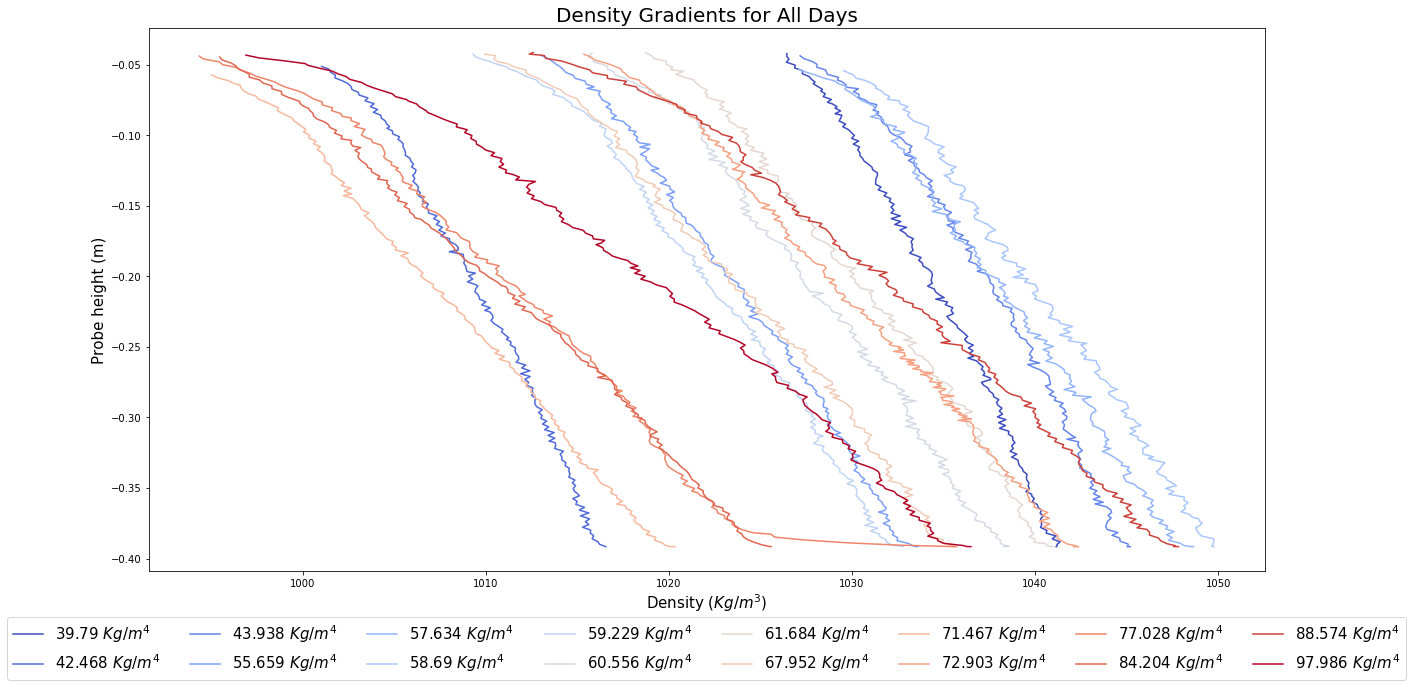

In [4]:
cm = plt.get_cmap('rainbow')
color = plt.cm.coolwarm(np.linspace(0,1,len(fnames)))
dpdzs,fnamesp = zip(*[(x, y) for x, y in sorted(zip(drhodz, fnames))])
plt.figure(figsize = (20,10))
for q in range(len(fnames)):
    data = np.loadtxt(fnamesp[q], skiprows = 1)
    time = data[:,0]
    ph = data[:,1]
    cond = data[:,2]
    places = np.where(np.roll(ph,1) > ph)[0]
    pr = np.empty((len(places),2))
    for i in range(len(places)):
        if i>=1:
            probeind = (places[i-1],places[i])
            pr[i,0] = probeind[0]
            pr[i,1] = probeind[1] 
    dupes = np.where(pr[:,1] - pr[:,0] == 1 )[0]
    pr = np.delete(pr, dupes, axis = 0)
    if len(pr) > 50:
        pr = pr[-12:]
    pr = pr[2:]
    cm = plt.get_cmap('rainbow')
    color = (plt.cm.coolwarm(np.linspace(0,1,len(fnames))))
    c = color[q]
    for b in range(len(pr)):
        xax = int(pr[b,0])+23
        yax = int(pr[b,1]) 
        tx = time[xax:yax:1]
        cplot = (cond[xax:yax:1])
        cplot = cplot[1:]
        rhoplot = bfit1[0]*cplot + bfit1[1]
        pplot = (ph[xax:yax:1])/1000.0
        pplot = pplot[1:]
        labe = truncate(dpdzs[q],3)
    plt.plot(rhoplot, -pplot, label = str(labe)+' $Kg/m^{4}$',c=c)
    plt.title('Density Gradients for All Days',fontsize=20)
    plt.xlabel("Density ($Kg/m^{3}$)", fontsize=15)
    plt.ylabel('Probe height (m)', fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.07), ncol = len(fnames)/2,fontsize=15)
plt.savefig('Gradientsforalldays.png')
plt.show()

for q in range(len(fnames)):
    fileused = fnamesp[q]
    fnameused = fileused[5:]
    data = np.loadtxt(fnamesp[q], skiprows = 1)
    time = data[:,0]
    ph = data[:,1]
    cond = data[:,2]
    places = np.where(np.roll(ph,1) > ph)[0]
    pr = np.empty((len(places),2))
    for i in range(len(places)):
        if i>=1:
            probeind = (places[i-1],places[i])
            pr[i,0] = probeind[0]
            pr[i,1] = probeind[1] 
    dupes = np.where(pr[:,1] - pr[:,0] == 1 )[0]
    pr = np.delete(pr, dupes, axis = 0)
    if len(pr) > 50:
        pr = pr[-12:]
    pr = pr[2:]
    for b in range(len(pr)):
        xax = int(pr[b,0]) 
        yax = int(pr[b,1]) 
        tx = time[xax:yax:1]
        cplot = (cond[xax:yax:1])
        cplot = cplot[1:]
        rhoplot = bfit1[0]*cplot + bfit1[1]
        pplot = (ph[xax:yax:1])/1000.0
        pplot = pplot[1:]
        plt.plot(rhoplot, -pplot, label = (dpdzs[q], fnamesp[q]))
        plt.title('Density Gradients for ')
        plt.xlabel("Density (Kg/m3)")
        plt.ylabel('Probe height (m)')
        saveto = 'plots/'
        name = 'run ' + str(b) + ' ' + fnameused + '.png'
        plt.savefig(saveto + name )
        plt.show()

[ 40.00893526  37.44149955  36.22303514  37.26596013  36.71117771
  37.03971394  39.67664096  42.05840571  39.74865204  28.62871378
  28.1086651   44.22385775  42.24584514  42.17791016  27.66839223
  43.91923896  54.01863353  54.47530336  54.91554912  47.98132331
  50.37062116  48.97292846]
[-71.46788888 -42.46800173 -59.22901245 -72.90336553 -84.20401098
 -55.65907096 -60.55694147 -88.57493095 -57.6342968  -39.79005623
 -43.93815141 -77.02822927 -67.95281146 -97.98645832 -61.68472615
 -58.69039917 -66.75128716 -40.88696772 -50.30970226 -99.02853597
 -84.29415191 -70.02596156]


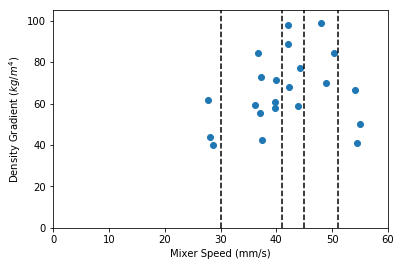

In [5]:
infile1 = sorted(glob.glob('p2dat/*'))
mixvel = np.empty(len(infile1))
for i in range(len(infile1)):
    datamix = np.loadtxt(infile1[i], skiprows = 1)
    ti = datamix[:,0]
    phm = datamix[:,1]
    mix = datamix[:,2]
    index = np.where(np.roll(phm,1)!= phm)[0]
    end = len(phm) - 1
    index = np.append(index,end)
    places1 = len(index)
    pr1 = np.empty((places1,2))
    
    for b in range(places1):
        if b >= 1:
            probeind1 = (index[b-1], index[b])
            pr1[b,0] = probeind1[0]
            pr1[b,1] = probeind1[1]

    pr1 = pr1[1:]
    #print(len(pr1))
    dupes1 = np.where(pr1[:,1] - pr1[:,0] < 100 )[0]
    pr1 = np.delete(pr1, dupes1, axis = 0)
    mixv = np.empty(len(pr1))
    
    for j in range(len(pr1)):
        xax2 = int(pr1[j,0] + (pr1[j,1] - pr1[j,0]) * 0.4)
        yax2 = int(pr1[j,1] - (pr1[j,1] - pr1[j,0]) * 0.4)
        Mx = np.arange(1, yax2-xax2 + 1, 1)
        #print(xax2,yax2)
        mixdim = mix[xax2:yax2:1]
        diffsv = np.empty(len(Mx))
        #print(mixdim)
        for k in range(len(Mx)):
            Mind = Mx[k]
            diffsm = abs(mix[Mind] - mix[k])
            diffst = abs(ti[Mind] - ti[k])
            diffs = diffsm/diffst
            diffsv[k] = diffs
            #print(ti[Mind])
        vav = np.mean(diffsv)
        #print(vav)
        mixv[j] = vav
    #print(mixv)
    u = np.mean(mixv)
    mixvel[i] = u

print(mixvel)
print(-drhodz)

plt.axis(xmin=0,xmax=60,ymin=0,ymax=105)
plt.scatter(mixvel, drhodz)
plt.axvline(x=30, color='k', linestyle='--')
plt.axvline(x=41, color='k', linestyle='--')
plt.axvline(x=45, color='k', linestyle='--')
plt.axvline(x=51, color='k', linestyle='--')
plt.xlabel('Mixer Speed (mm/s)')
plt.ylabel('Density Gradient' +' $(kg/m^{4})$')
plt.savefig('Cloud.png')
plt.show()

In [6]:
midz = -0.22

rhomid = (drhodz * midz) + interceptdensity
Ri = 9.8*drhodz/(rhomid*(mixvel/90)**2)
Ri

array([ 3.62890026,  2.42604904,  3.59390125,  4.17477595,  5.08830639,
        3.22082002,  3.04793818,  3.99825551,  2.85733509,  3.78747903,
        4.33314018,  3.19535883,  3.03840327,  4.47349002,  6.36973005,
        2.38024903,  1.78471263,  1.06416053,  1.29066253,  3.46089538,
        2.61505367,  2.25896276])

In [12]:
velfolder = sorted(glob.glob('velocitydata/*'))
print(velfolder)

['velocitydata/02-26data', 'velocitydata/03-01data', 'velocitydata/03-04data', 'velocitydata/03-06data', 'velocitydata/03-08data', 'velocitydata/03-12data', 'velocitydata/03-15data', 'velocitydata/03-18data', 'velocitydata/03-19data', 'velocitydata/03-22data', 'velocitydata/03-26data', 'velocitydata/03-27data', 'velocitydata/03-29data', 'velocitydata/04-02data', 'velocitydata/04-05data', 'velocitydata/04-09data', 'velocitydata/04-11data', 'velocitydata/04-15data', 'velocitydata/04-17data', 'velocitydata/04-18data', 'velocitydata/05-01data', 'velocitydata/05-03data']


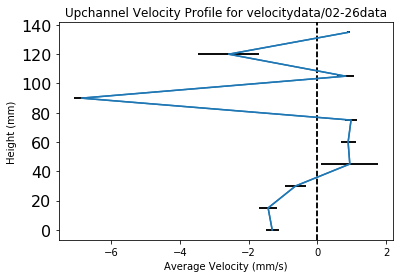

[ 0.0472703   0.87960888  0.24363934  0.22372354  0.17659169  0.21758813
  0.82621778  0.31749696  0.25555672  0.19319207]


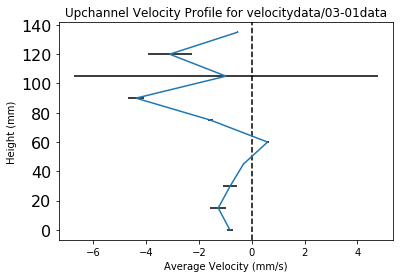

[-0.0161692  -0.8276566  -5.76715426  0.29020905 -0.10153518 -0.04148735
 -0.01730742  0.27489604  0.29547438  0.10566911]


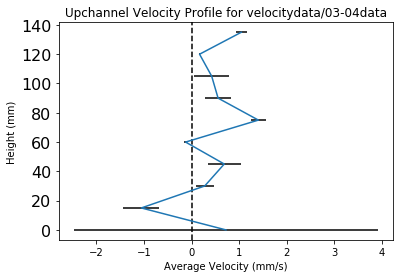

[  1.13184027e-01  -2.05684387e-03   3.69484324e-01   2.82014601e-01
   1.56859843e-01   3.33047377e-02   3.41927601e-01  -1.89507190e-01
   3.78254365e-01   3.19930045e+00]


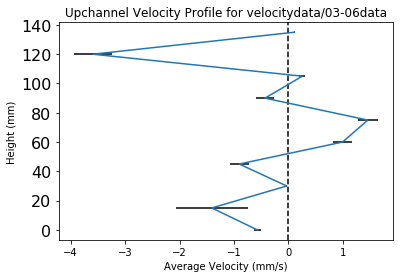

[-0.00715987  0.3502267  -0.05150439 -0.17158123  0.18964914  0.17547291
 -0.17714152  0.00441593  0.66375635 -0.06818512]


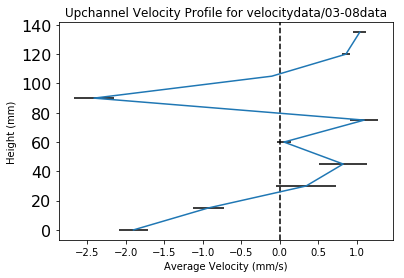

[ 0.08519338  0.04915145  0.00189947 -0.26203075  0.18104169 -0.09294517
 -0.30913541  0.38825545  0.19872168  0.18263099]


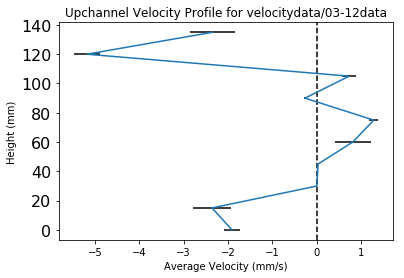

[  5.07454616e-01   2.91695078e-01   1.65731057e-01  -2.96701960e-02
   9.83482086e-02   4.03221845e-01   2.65766053e-03   1.23422408e-04
   4.39195242e-01   1.76772609e-01]


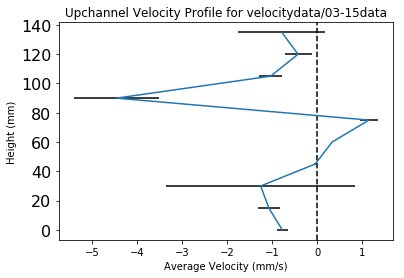

[ 0.96314093  0.30003725  0.26027415  0.94923133  0.20609996  0.00229166
  0.01851214 -2.09393252  0.24507225  0.11872292]


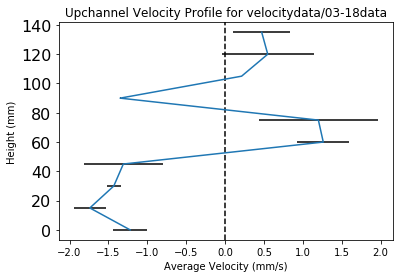

[ -3.65617083e-01   5.92453450e-01   6.81897197e-04  -6.02126065e-03
   7.68484933e-01   3.32657734e-01   5.07064122e-01   8.64885631e-02
   2.06263075e-01  -2.19106398e-01]


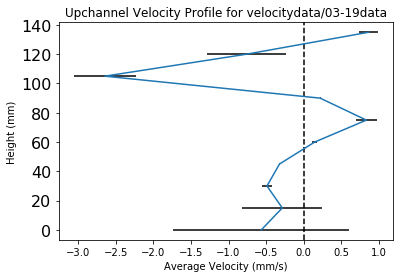

[ 0.12649075  0.52978862  0.41312017 -0.00513038  0.13894111 -0.03432644
  0.00920286 -0.07119123  0.53254111 -1.17128109]


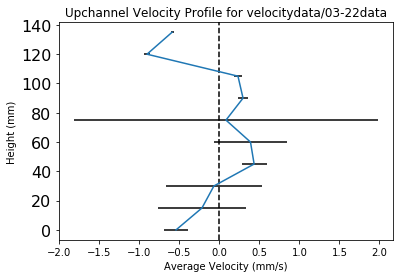

[-0.01881996 -0.03406245  0.04672319  0.05767705  1.90098246  0.46031934
  0.15529534  0.59506258  0.54944901  0.14722936]


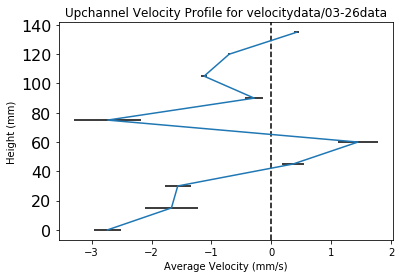

[-0.04720588  0.011445   -0.04898774  0.15359361 -0.56300983  0.33749325
  0.18421069  0.22045165  0.43944443  0.22066471]


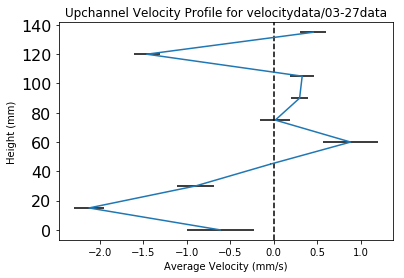

[-0.15172485 -0.15164996  0.13473168 -0.09705649  0.17148292  0.31696471
 -0.00447162  0.21788079  0.17494912  0.38783715]


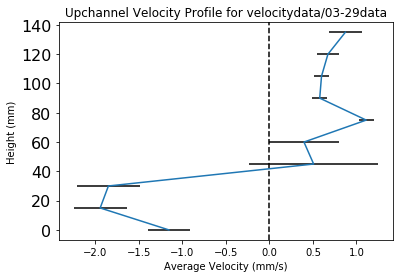

[ 0.18727125  0.12371149  0.08614317  0.08543592  0.08648374  0.40497587
  0.74056907  0.36348855  0.30286666  0.24512797]


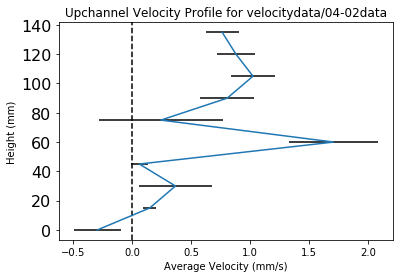

[ 0.13849127  0.15803556  0.18425248  0.22881585 -0.52635881  0.3769382
 -0.07006704  0.31102275 -0.0556857   0.19952668]


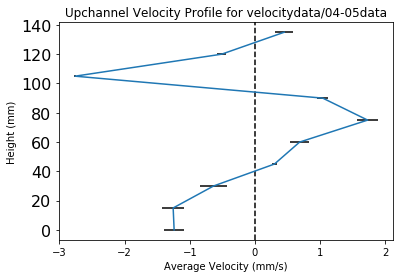

[ 0.13549466  0.07081078 -0.01980668  0.08401318  0.16132298  0.14479169
 -0.03688854  0.20741908  0.16657332  0.15520444]


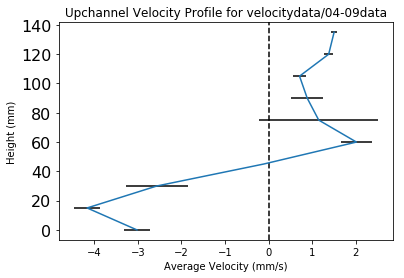

[ 0.07616179  0.10066895  0.14823646  0.37087116  1.36206442  0.35469082
 -0.00234611  0.70739641  0.30492471  0.28824237]


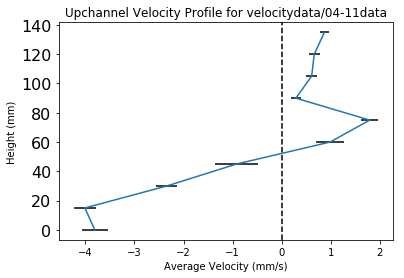

[ 0.08633298  0.1093409   0.1176914  -0.10565629  0.17228328  0.28602178
  0.43244668  0.21016184  0.22544056  0.26515429]


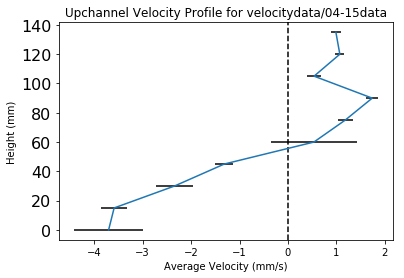

[ 0.09711887  0.09606855  0.14279873  0.1227314   0.15863567  0.8903342
  0.18442574  0.3764245   0.26279881  0.71907619]


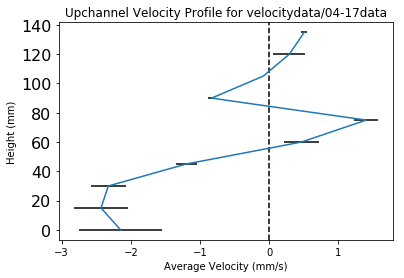

[  4.26320797e-02   2.30472416e-01   2.00457156e-04   5.67211349e-02
   1.73037053e-01  -2.49755902e-01   1.51500658e-01   2.56543035e-01
   3.93562873e-01   6.00161348e-01]


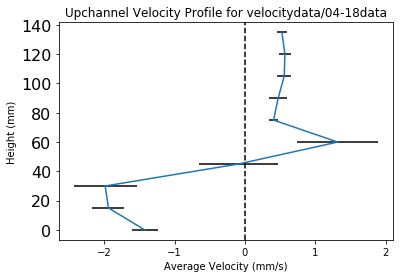

[ 0.06827444  0.08433262  0.09568084  0.12324854  0.06358392  0.57413209
  0.56383513  0.44577983  0.227177    0.1847181 ]


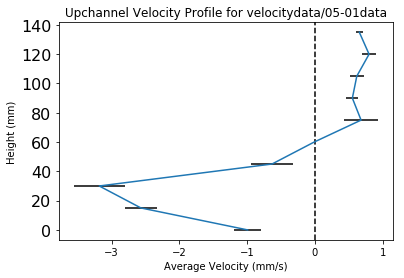

[ 0.05468071  0.10866154  0.10148233  0.08800598  0.2521829  -0.00492199
 -0.30407615  0.37572644  0.23850025  0.20045755]


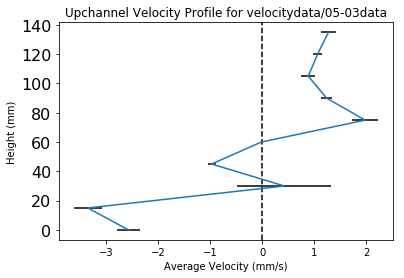

[  1.50224867e-01   8.23221862e-02   1.36798183e-01   1.02092858e-01
   2.50671369e-01  -6.59640978e-04  -7.88817085e-02   9.05482128e-01
   2.71151777e-01   2.27606501e-01]


In [14]:
#gate = np.arange(4.5, 188.25, 0.75)
gate = np.arange(7.5, 75.75, 0.75)
gatedep = np.arange(139,(274+15), 15)
g = gatedep * -1
dim2 = np.arange(0,10,1)
dim1 = -1*np.arange(1,148,1)
integralx = np.empty((len(velfolder), len(gatedep)))
#standarderror = np.empty((len(velfolder), len(gatedep)))
standarderror = np.empty((len(gatedep), len(velfolder)))
for i in range(len(velfolder)):
    dirlist = sorted(glob.glob(velfolder[i] + '/*'))
    sortedfiles = np.reshape(dirlist, (-1, 2))
    dim = len(sortedfiles[:,0])
    averages = np.empty((dim))
    sterror = np.empty((dim))

  
    for j in range(dim):
        veldata1 = pd.read_csv(sortedfiles[j,0], sep = '\t', skiprows = 5, engine = 'python')
        veldata2 = pd.read_csv(sortedfiles[j,1], sep = '\t', skiprows = 5, engine = 'python')
        veldata1.drop(veldata1.columns[dim1], axis=1, inplace=True)
        veldata2.drop(veldata2.columns[dim1], axis=1, inplace=True)
        veldata1.drop(veldata1.columns[dim2], axis=1, inplace=True)
        veldata2.drop(veldata2.columns[dim2], axis=1, inplace=True)
        veldata1.loc['avg'] = veldata1.mean()
        veldata2.loc['avg'] = veldata2.mean() #take std as well
        veldata1.loc['std'] = veldata1.std()
        veldata2.loc['std'] = veldata2.std()
        avvel1 = np.array(veldata1.loc['avg'])
        avvel2 = np.array(veldata2.loc['avg'])
        
        upperq1 = np.percentile(avvel1,70)
        lowerq1 = np.percentile(avvel1,30)
        upperq2 = np.percentile(avvel2,70)
        lowerq2 = np.percentile(avvel2,30)
        #st1 = np.std(avvel1[np.where(np.logical_and((avvel1 > lowerq1),(avvel1 <upperq1)))])
        #st2 = np.std(avvel2[np.where(np.logical_and((avvel2 > lowerq2),(avvel2 <upperq2)))])
        st1 = np.std(avvel1[np.where(np.logical_and((avvel1 > lowerq1),(avvel1 <upperq1)))])
        st2 = np.std(avvel2[np.where(np.logical_and((avvel2 > lowerq2),(avvel2 <upperq2)))])
        mv1 = np.mean(avvel1[np.where(np.logical_and((avvel1 > lowerq1),(avvel1 <upperq1)))])
        mv2 = np.mean(avvel2[np.where(np.logical_and((avvel2 > lowerq2),(avvel2 <upperq2)))])
        relerr = 0.5 * ((st1/mv1) + (st2/mv2))
        sterr = (mv1+mv2)*0.5*relerr
        avvel = (avvel1+avvel2) * 0.5
        avvel = avvel[:-1]
        avvel0 = avvel[:len(gate)]
        averages[j] = np.mean(avvel0)
        sterror[j] = sterr
        #print(len(avvel1), len(gate))
        
           
    integralx[i,:] = averages
    standarderror[:,i] = sterror
    plt.errorbar(averages, g, xerr=abs(sterror),ecolor='k')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlabel('Average Velocity (mm/s)')
    plt.ylabel('Height (mm)')
    ticksy = [-274,-254,-234,-214,-194,-174,-154,-134]
    ticksylab = ['0','20','40','60','80','100','120','140']
    plt.yticks(ticksy,ticksylab,fontsize=16)
    plt.title('Upchannel Velocity Profile for ' + velfolder[i])
    plt.savefig('figure'+str(i)+'.png' )
    plt.show()
    print(sterror)

In [124]:
#print(integralx)
intercepts = np.empty((len(integralx), len(integralx[0])-1))
for t in range(len(integralx)):
    inte = integralx[t]
    bds = np.empty((len(inte),2))
    for i in range(len(inte)):
        if i >=1:
            bounds = (inte[i-1], inte[i])
            bds[i,0] = bounds[0]
            bds[i,1] = bounds[1]
    boundary = bds[1:]

    ybound = np.empty((len(gatedep), 2))
    for i in range(len(gatedep)):
        if i >= 1:
            ycoord = gatedep[i-1], gatedep[i]
            ybound[i,0] = ycoord[0]
            ybound[i,1] = ycoord[1]

    ypts = ybound[1:]

    yint = np.zeros(len(boundary))
    for i in range(len(boundary)):
        x1 = boundary[i,0]
        x2 = boundary[i,1]
        y1 = ypts[i,0]
        y2 = ypts[i,1]
        xax = [x1,x2]
        yax = [y1,y2]
        if x1 >= 0 and x2 <= 0 or x1 <= 0 and x2 >= 0:
            fit = np.polyfit(xax,yax,deg=1)
            yint[i] = fit[1]
    intercepts[t] = yint



In [125]:
integralslayer1 = np.empty(len(intercepts))
integralslayer2 = np.empty(len(intercepts))
for j in range(len(intercepts)):
    ints = intercepts[j]
    ynot0 = np.nonzero(ints)
    yintercept = ints[ynot0]
    yintercepts = yintercept[::-1]
    allpts = sorted(np.append(gatedep, yintercepts), reverse=True)
    intspot0 = np.where(allpts == yintercepts[0])
    if len(yintercepts) >= 2:
        intspot1 = np.where(allpts == yintercepts[1])
    lim = intspot0[0] + 1
    intbd = allpts[:lim[0]]
    lim1 = intspot1[0] + 1
    intbd1 = allpts[:lim1[0]]
### compute trapezoids  (A+B)/2 * h x = A,B, y = h
    xbd = integralx[j]
    xbound = xbd[::-1]
    xb = np.append(xbound[:lim[0]-1], 0)
    xboundary = np.empty((len(intbd),2))
    ydiff = np.empty(len(xb))
   
    if intbd1[-1] < 184:
        intbd1[-1] = 184
   
    for i in range(len(xb)):
        if i >=1:
            boundaryx = xb[i-1], xb[i]
            xboundary[i,0] = boundaryx[0]
            xboundary[i,1] = boundaryx[1]
            boundaryy = intbd[i-1], intbd[i]
            ydiff[i] = boundaryy[0] - boundaryy[1]
    xboundary = xboundary[1:]
    ydiff = ydiff[1:]
   
    
    xb1 = np.append(xbound[lim[0]-1:lim1[0]-2], 0)
    xboundary1 = np.empty((len(intbd1),2))
    ydiff1 = np.empty(len(xb1))
    #print(xb1)
    for i in range(len(xb1)):
        if i >=1:
            boundaryx1 = xb1[i-1], xb1[i]
            xboundary1[i,0] = boundaryx1[0]
            xboundary1[i,1] = boundaryx1[1]
            boundaryy1 = intbd1[i-1], intbd1[i]
            ydiff1[i] = boundaryy1[0] - boundaryy1[1]
    xboundary1 = xboundary1[1:]
    ydiff1 = ydiff1[1:] 
    
    #print(len(intbd1),len(intbd))
    trapezoid = np.empty(len(ydiff))
    for i in range(len(ydiff)):
        A = abs(xboundary[i,0])
        B = abs(xboundary[i,1])
        h = ydiff[i]
        trap = h * (A+B)/2.0
        trapezoid[i] = trap
    integral = np.sum(trapezoid)
    integralslayer1[j] = integral
    
    trapezoid1 = np.empty(len(ydiff1))
    for i in range(len(ydiff1)):
        A1 = abs(xboundary1[i,0])
        B1 = abs(xboundary1[i,1])
        h1 = ydiff1[i]
        trap1 = h1 * (A1+B1)/2.0
        trapezoid1[i] = trap1
    #print(xboundary1)
    integral1 = np.sum(trapezoid1)
    integralslayer2[j] = integral1
    
chanwidth = 300
t1 = integralslayer1 * chanwidth
t2 = integralslayer2 * chanwidth
print(integralslayer1)
print('-------------------------------------------------------------------------------------')
print(integralslayer2)
print('-------------------------------------------------------------------------------------')
print(-t1+t2)

[  38.08918496   40.78550515    2.20606439   35.85329633   26.29242325
   49.75660623   41.0729518    71.5350018    19.95045078    7.90482985
   66.76738771   50.21297675   62.50392704    1.4633428    36.15625458
  124.40132568  134.10778297  133.63150163  102.98652729   70.36680203
  103.27388162   66.85352866]
-------------------------------------------------------------------------------------
[ 30.8443905    4.4739051    3.22002694  29.36829357  24.09513358
  16.16870422  19.73836722  27.45199262  16.8374562   15.24982366
  24.37107251  13.90419395  34.44913922  60.79699555  42.08636271
  45.55666652  38.7001723   47.84538137  24.52805529  15.98636876
   5.10971749   3.18088356]
-------------------------------------------------------------------------------------
[ -2173.43833692 -10893.48001612    304.18876441  -1945.50082988
   -659.18690098 -10076.37060485  -6400.37537317 -13224.90275421
   -933.89837425   2203.49814297 -12718.89455952 -10892.63484033
  -8416.43634699  17800.095

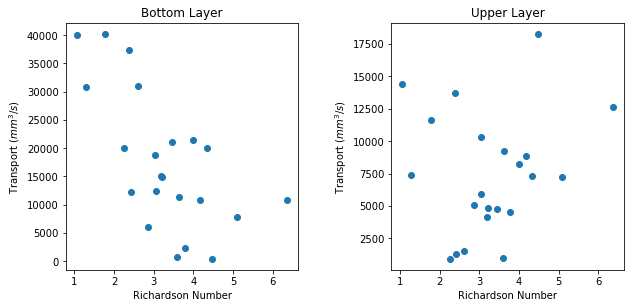

In [126]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(Ri,t1)
plt.title('Bottom Layer')
plt.xlabel('Richardson Number')
plt.ylabel('Transport' + ' $(mm^{3}/s)$')
plt.subplot(222)
plt.scatter(Ri,t2)
plt.title('Upper Layer')
plt.xlabel('Richardson Number')
plt.ylabel('Transport' + ' $(mm^{3}/s)$')
plt.subplots_adjust(wspace=0.4)
plt.savefig('Transports.png')
plt.show()

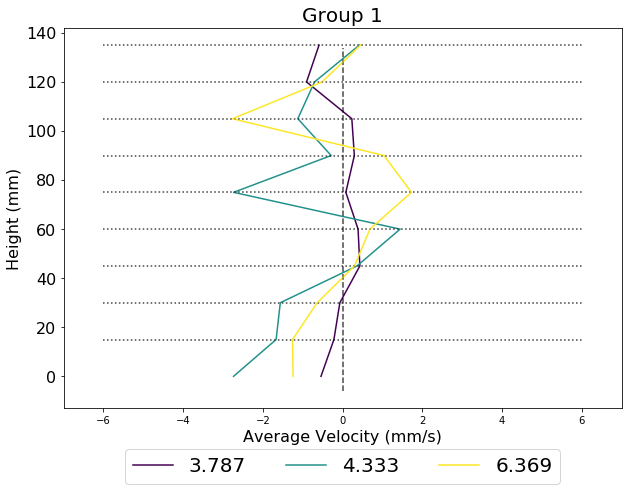

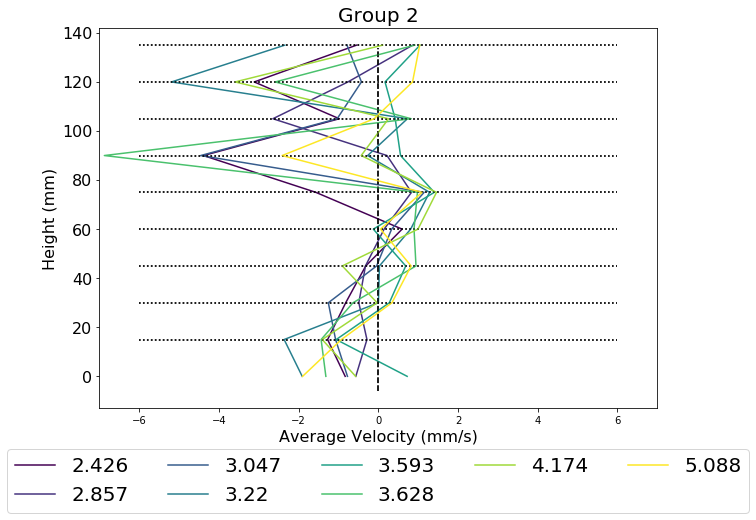

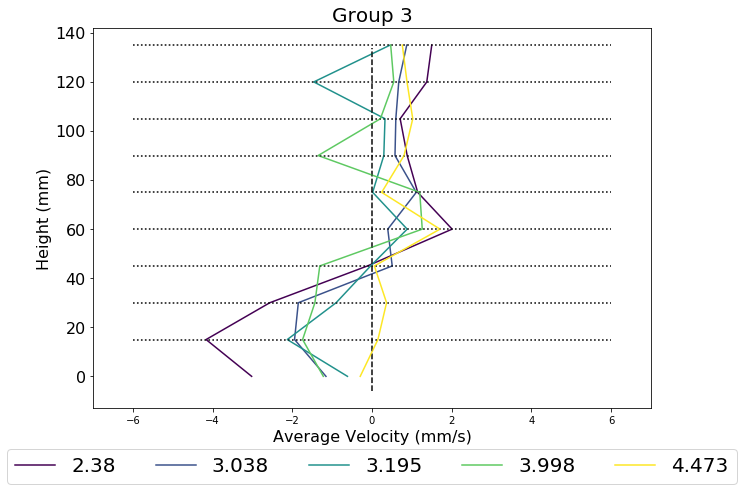

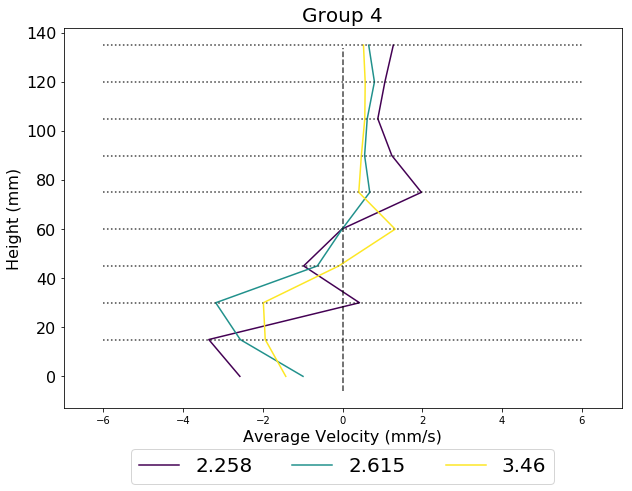

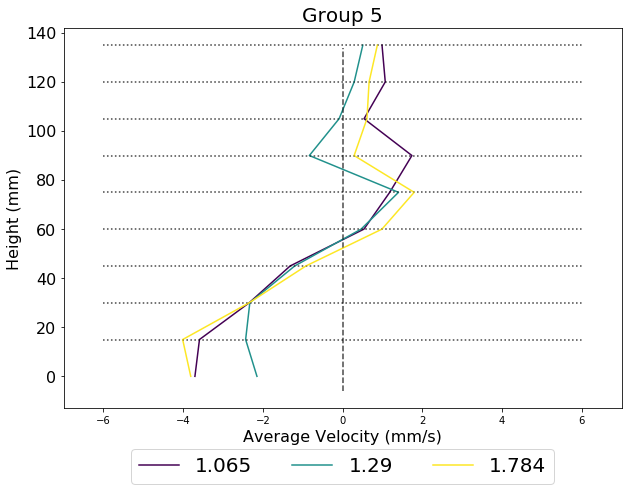

5


In [127]:
limb = np.where(np.logical_and(mixvel>=30, mixvel<=41))[0] #group2
lima = np.where(np.logical_and(mixvel<30, mixvel>0))[0] #group1
limc = np.where(np.logical_and(mixvel<45, mixvel>41))[0] #group3
limd = np.where(np.logical_and(mixvel<51, mixvel>45))[0] #group4
lime = np.where(mixvel>51)[0] # group5

ticksy = [-274,-254,-234,-214,-194,-174,-154,-134]
ticksylab = ['0','20','40','60','80','100','120','140']
#print(lima)
color = (plt.cm.coolwarm(np.linspace(0,1,len(Ri))))
lims = [lima, limb, limc, limd, lime]
for i in range(len(lims)):
    lim = lims[i]
    Ris = Ri[lim]
    Risorted,limx = zip(*[(x, y) for x, y in sorted(zip(Ris, lim))])
    plt.figure(figsize=(10,7))
    for j in range(len(limx)):
        color = (plt.cm.viridis(np.linspace(0,1,len(limx))))
        p = limx[j]
        average = integralx[p]
        lab = truncate(Ri[p],3)
        plt.plot(average,g,label=lab,c = color[j])
        plt.axis(xmax=7,xmin = -7)
        plt.xlabel('Average Velocity (mm/s)',fontsize=16)
        plt.ylabel('Height (mm)',fontsize=16)
        plt.yticks(ticksy,ticksylab,fontsize=16)
        plt.xticks
        plt.plot([0,0],[-280,-140],'k--',alpha=0.3)
        plt.plot([-6,6],[-259,-259],'k:',alpha=0.3)
        plt.plot([-6,6],[-244,-244],'k:',alpha=0.3)
        plt.plot([-6,6],[-229,-229],'k:',alpha=0.3)
        plt.plot([-6,6],[-214,-214],'k:',alpha=0.3)
        plt.plot([-6,6],[-199,-199],'k:',alpha=0.3)
        plt.plot([-6,6],[-184,-184],'k:',alpha=0.3)
        plt.plot([-6,6],[-169,-169],'k:',alpha=0.3)
        plt.plot([-6,6],[-154,-154],'k:',alpha=0.3)
        plt.plot([-6,6],[-139,-139],'k:',alpha=0.3)
        plt.legend(loc = 0)
        plt.title('Group ' + str(i+1), fontsize=20)
        col = len(average)
        if len(average) > 5:
            col = len(average)/2
        plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.08), ncol = col, fontsize=20)
        plt.savefig('Group'+str(i+1)+'.png')
        #print(Risorted)
    
    plt.show()
print(len(lims))
#print(lims[4])   
###Trim to highest peg###

In [142]:
rhov = np.empty((len(infile1), 10))
rhos = np.empty((len(infile1), 10))
for a in range(len(infile1)):
    print(a)
    data1 = np.loadtxt(infile1[a], skiprows = 1)
    ti = data1[:,0]
    ph1 = data1[:,1]
    mix = data1[:,2]
    cond1 = data1[:,3]

    index = np.where(np.roll(ph1,1)!= ph1)[0]
    end = len(ph1) - 1
    index = np.append(index,end)
    places1 = len(index)
    pr1 = np.empty((places1,2))
    for i in range(places1):
        if i >= 1:
            probeind1 = (index[i-1], index[i])
            pr1[i,0] = probeind1[0]
            pr1[i,1] = probeind1[1]

    pr1 = pr1[1:]

    #print(places1)
    dupes1 = np.where(pr1[:,1] - pr1[:,0] < 100 )[0]
    pr1 = np.delete(pr1, dupes1, axis = 0)
    
    #velocimiter conductivity
    #print(infile1[-1])
    mrho = np.empty(len(pr1))
    deps = np.empty(len(pr1))
    for j in range(len(pr1)):
        xax1 = int(pr1[j,0])
        yax1 = int(pr1[j,1])
        time = ti[xax1:yax1:1]
        con = cond1[xax1:yax1:1]
        time = time[1:]
        con = con[1:]
        den = bfit2[0]*con + bfit2[1]
        if a > 15:
            den = bfit4[0]*con + bfit4[1]
        plt.plot(time, den)
        plt.title('Probe 2 density at Height ' + str(ph1[xax1]) + 'mm') 
        plt.xlabel('Time (s)')
        plt.ylabel('Density (kg/m^3)')
        mrho[j] = np.mean(den)
        deps[j] = ph1[xax1] 
     
        #plt.show()
    #print(len(mrho))
    mrhos,depss = zip(*[(x, y) for x, y in sorted(zip(mrho, deps))])

    rhoarranged = np.reshape(mrhos, (-1,2))

    avden = np.empty(len(rhoarranged))
    stden = np.empty(len(rhoarranged))
    for b in range(len(rhoarranged)):
        avrho = np.mean(rhoarranged[b])
        avden[b] = avrho
        strho =np.std(rhoarranged[b])
        stden[b] = strho
    vrho = avden#*mixvel[a]*0.001
    rhov[a] = vrho
    rhos[a] = stden
    mrhox = mrho * mixvel[-1]
    #plt.plot(mrhox, g)
    #plt.show()
rhos

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


array([[ 0.00713521,  0.12796487,  0.13199775,  0.14680018,  0.25796882,
         0.38124121,  0.28401582,  0.40914142,  0.53928357,  0.57602923],
       [ 0.01109263,  0.01339363,  0.24185795,  0.31108591,  0.38466716,
         0.32931621,  0.23105653,  0.20654423,  0.21009421,  0.37406678],
       [ 0.17833514,  0.11364834,  0.47214251,  0.42397876,  0.5977503 ,
         0.12584751,  0.45329413,  0.47797737,  0.66947863,  0.88096043],
       [ 0.03705429,  0.30217636,  0.61680337,  0.60665681,  0.48436751,
         0.38007654,  0.08401374,  0.05313477,  0.01039939,  0.00264114],
       [ 0.06427925,  0.2074959 ,  0.35469283,  0.49584455,  0.62217316,
         0.69396569,  0.7026649 ,  0.65596409,  0.73241667,  0.62276164],
       [ 0.03142588,  0.0210311 ,  0.04934718,  0.03120747,  0.53870607,
         0.45932095,  0.04698307,  0.07327223,  0.18150858,  0.56020332],
       [ 0.10055557,  0.06201358,  0.34053683,  0.24896995,  0.36790973,
         0.38319662,  0.4585167 ,  0.39143765

0


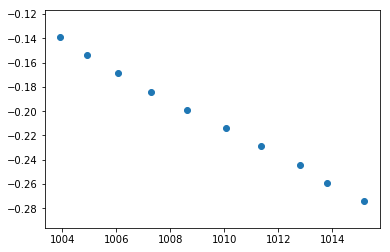

1520.53435288
1


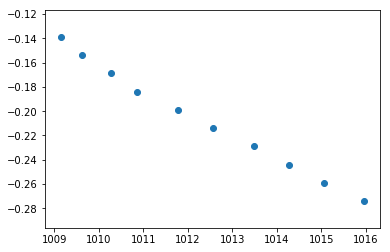

1518.73551765
2


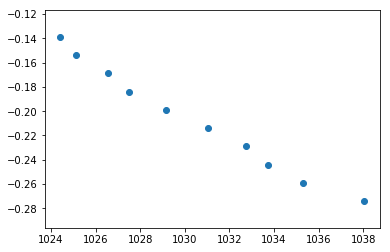

1543.18304473
3


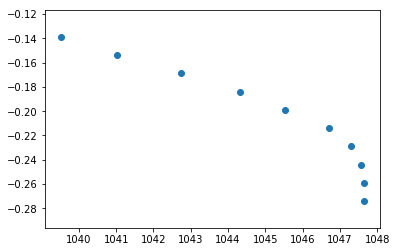

1566.45614646
4


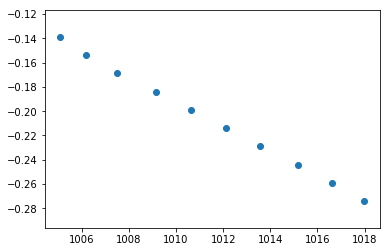

1522.52032524
5


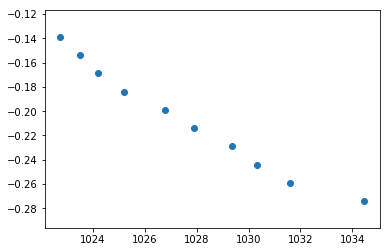

1539.70626828
6


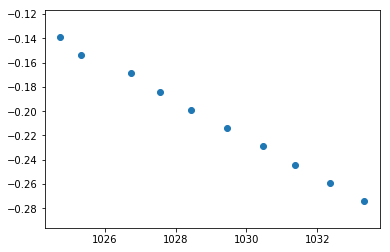

1544.06688561
7


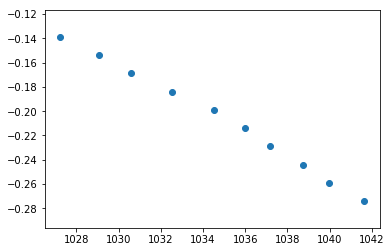

1551.88168538
8


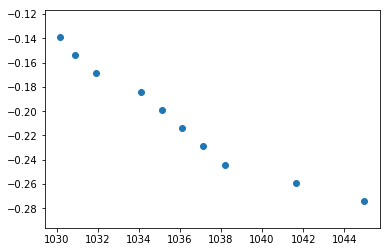

1554.5191931
9


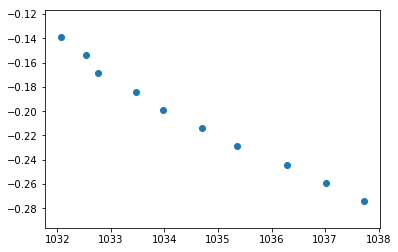

1553.14970631
10


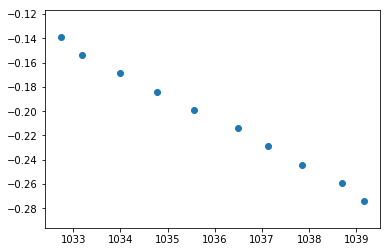

1554.14950508
11


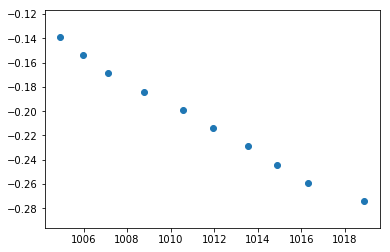

1521.00254748
12


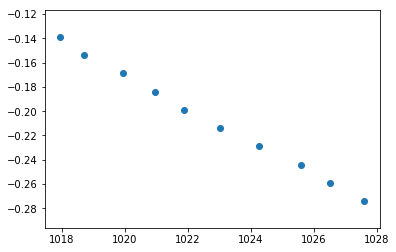

1533.19181078
13


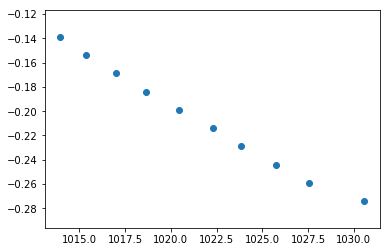

1533.02877602
14


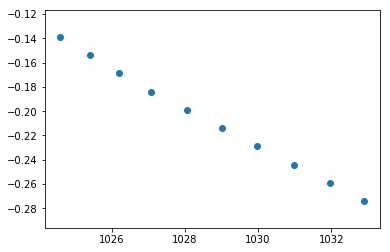

1542.96813152
15


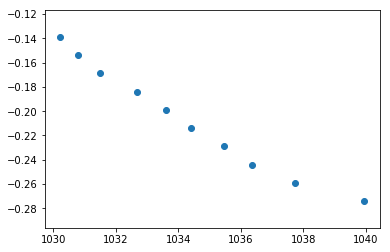

1551.01229952
16


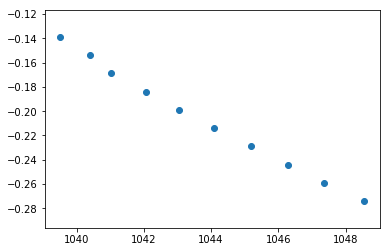

1564.85259928
17


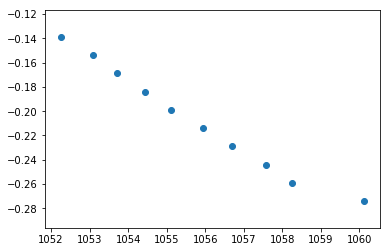

1582.34304657
18


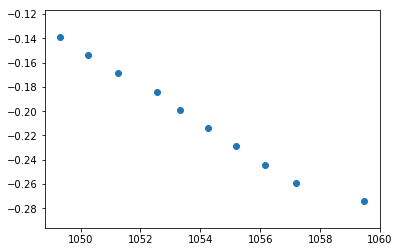

1581.55847128
19


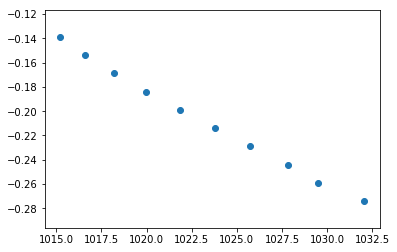

1539.8122391
20


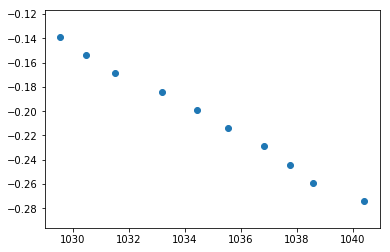

1551.61318844
21


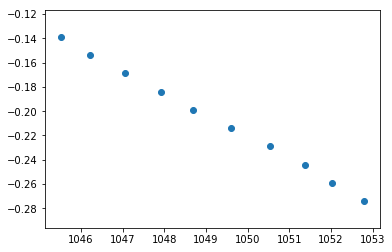

1572.30783082
[ 1520.53435288  1518.73551765  1543.18304473  1566.45614646  1522.52032524
  1539.70626828  1544.06688561  1551.88168538  1554.5191931   1553.14970631
  1554.14950508  1521.00254748  1533.19181078  1533.02877602  1542.96813152
  1551.01229952  1564.85259928  1582.34304657  1581.55847128  1539.8122391
  1551.61318844  1572.30783082]


In [136]:
integralrhov = np.empty(len(mixvel))
for i in range(len(mixvel)):
    print(i)
    x = rhov[i]
    gdiff = 0.15
    traps = np.empty(len(rhoarranged))
    for k in range(len(x)):
        if k >= 1:
            xb = (x[k-1], x[k])
        A = xb[0]
        B = xb[1]
        trap = gdiff*(A+B)/2.0
        traps[k] = trap
    trapsum = np.sum(traps)
    integralrhov[i] = trapsum
    plt.scatter(x,g*0.001)
    plt.show()
    print(trapsum)
print(integralrhov)


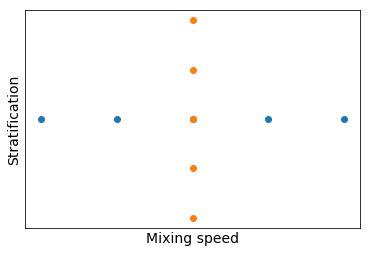

In [10]:
px = np.arange(1,6,1)
py = np.zeros(5)+5
p1x = np.zeros(5)+3
p1y = np.arange(1,11,2)
plt.scatter(px,py)
plt.scatter(p1x,p1y)
plt.ylabel("Stratification",fontsize=14)
plt.xlabel('Mixing speed',fontsize=14)
plt.yticks([])
plt.xticks([])
plt.savefig('parameterspace.png')
plt.show()

In [75]:
dim1

array([-1, -2, -3, -4, -5, -6])